Notebook 3: Where we carry on explaining overfitting, now in the realm of  neural networks
------------------------------------------------------------------------------------------
We generate data from a "mistery polynomial" and we add some noise. Given the data, our goal is to obtain the best approximation to the data, not only the ones we train on but also fresh test data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, display

import keras.backend as K
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


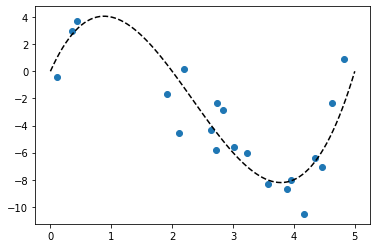

In [2]:
LOW_X = 0
HIGH_X = 5

def mistery_function(x):
    return x**3 - 7*x**2 + 10*x

def generate_data(num_data = 20, noise = 1.5, seed=0):
    rst = np.random.RandomState(seed)
    x_data = rst.uniform(LOW_X, HIGH_X, num_data)
    y_data = mistery_function(x_data) + noise*rst.randn(num_data)
    return x_data, y_data

x, y = generate_data() # Training dataset
x_val, y_val = generate_data(seed=2) # Validation dataset

x_plot = np.linspace(LOW_X, HIGH_X, 100)
y_plot = mistery_function(x_plot)
#x_val, y_val = generate_data(seed=2)

fig, ax = plt.subplots(1)
ax.scatter(x, y)
ax.plot(x_plot, y_plot, '--k')
plt.show()

W0821 10:17:22.393742 140178054403904 deprecation_wrapper.py:119] From /home/pacorofe/miniconda3/envs/idtrackerai_notebooks/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 10:17:22.406679 140178054403904 deprecation_wrapper.py:119] From /home/pacorofe/miniconda3/envs/idtrackerai_notebooks/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 10:17:22.408395 140178054403904 deprecation_wrapper.py:119] From /home/pacorofe/miniconda3/envs/idtrackerai_notebooks/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 10:17:22.447292 140178054403904 deprecation_wrapper.py:119] From /home/pacorofe/miniconda3/envs/idtrackerai_notebooks/lib/python3.6/site-packages/keras/

Train on 20 samples, validate on 20 samples
Epoch 1/5000
20/20 [==============================] - 0s 25ms/step - loss: 29.4177 - val_loss: 15.5111
Epoch 2/5000
20/20 [==============================] - 0s 403us/step - loss: 24.8852 - val_loss: 13.3122
Epoch 3/5000
20/20 [==============================] - 0s 799us/step - loss: 20.7945 - val_loss: 11.3293
Epoch 4/5000
20/20 [==============================] - 0s 863us/step - loss: 17.0252 - val_loss: 9.5252
Epoch 5/5000
20/20 [==============================] - 0s 485us/step - loss: 13.4592 - val_loss: 8.2305
Epoch 6/5000
20/20 [==============================] - 0s 875us/step - loss: 10.6411 - val_loss: 7.8567
Epoch 7/5000
20/20 [==============================] - 0s 825us/step - loss: 9.2580 - val_loss: 8.7149
Epoch 8/5000
20/20 [==============================] - 0s 797us/step - loss: 9.8964 - val_loss: 10.1827
Epoch 9/5000
20/20 [==============================] - 0s 813us/step - loss: 11.7651 - val_loss: 10.8849
Epoch 10/5000
20/20 [======

20/20 [==============================] - 0s 303us/step - loss: 8.8690 - val_loss: 6.4720
Epoch 81/5000
20/20 [==============================] - 0s 460us/step - loss: 8.8660 - val_loss: 6.4550
Epoch 82/5000
20/20 [==============================] - 0s 287us/step - loss: 8.8629 - val_loss: 6.4367
Epoch 83/5000
20/20 [==============================] - 0s 272us/step - loss: 8.8603 - val_loss: 6.4197
Epoch 84/5000
20/20 [==============================] - 0s 441us/step - loss: 8.8569 - val_loss: 6.4023
Epoch 85/5000
20/20 [==============================] - 0s 292us/step - loss: 8.8544 - val_loss: 6.3870
Epoch 86/5000
20/20 [==============================] - 0s 464us/step - loss: 8.8516 - val_loss: 6.3753
Epoch 87/5000
20/20 [==============================] - 0s 606us/step - loss: 8.8489 - val_loss: 6.3661
Epoch 88/5000
20/20 [==============================] - 0s 323us/step - loss: 8.8378 - val_loss: 6.3728
Epoch 89/5000
20/20 [==============================] - 0s 461us/step - loss: 8.8329 - v

20/20 [==============================] - 0s 305us/step - loss: 7.8676 - val_loss: 3.9943
Epoch 160/5000
20/20 [==============================] - 0s 430us/step - loss: 7.8481 - val_loss: 3.9410
Epoch 161/5000
20/20 [==============================] - 0s 350us/step - loss: 7.8252 - val_loss: 3.9148
Epoch 162/5000
20/20 [==============================] - 0s 279us/step - loss: 7.8047 - val_loss: 3.8843
Epoch 163/5000
20/20 [==============================] - 0s 512us/step - loss: 7.7839 - val_loss: 3.8617
Epoch 164/5000
20/20 [==============================] - 0s 490us/step - loss: 7.7634 - val_loss: 3.8209
Epoch 165/5000
20/20 [==============================] - 0s 292us/step - loss: 7.7444 - val_loss: 3.7795
Epoch 166/5000
20/20 [==============================] - 0s 270us/step - loss: 7.7250 - val_loss: 3.7533
Epoch 167/5000
20/20 [==============================] - 0s 322us/step - loss: 7.7035 - val_loss: 3.7244
Epoch 168/5000
20/20 [==============================] - 0s 286us/step - loss: 7

Epoch 238/5000
20/20 [==============================] - 0s 471us/step - loss: 4.7847 - val_loss: 2.6616
Epoch 239/5000
20/20 [==============================] - 0s 575us/step - loss: 4.7326 - val_loss: 2.7032
Epoch 240/5000
20/20 [==============================] - 0s 349us/step - loss: 4.6853 - val_loss: 2.6370
Epoch 241/5000
20/20 [==============================] - 0s 515us/step - loss: 4.6170 - val_loss: 2.6315
Epoch 242/5000
20/20 [==============================] - 0s 349us/step - loss: 4.5389 - val_loss: 2.6222
Epoch 243/5000
20/20 [==============================] - 0s 506us/step - loss: 4.4051 - val_loss: 2.6158
Epoch 244/5000
20/20 [==============================] - 0s 389us/step - loss: 4.3006 - val_loss: 2.5498
Epoch 245/5000
20/20 [==============================] - 0s 436us/step - loss: 4.2145 - val_loss: 2.5372
Epoch 246/5000
20/20 [==============================] - 0s 330us/step - loss: 4.1751 - val_loss: 2.5975
Epoch 247/5000
20/20 [==============================] - 0s 507us

Epoch 317/5000
20/20 [==============================] - 0s 374us/step - loss: 1.5814 - val_loss: 2.5309
Epoch 318/5000
20/20 [==============================] - 0s 500us/step - loss: 1.5980 - val_loss: 2.7826
Epoch 319/5000
20/20 [==============================] - 0s 304us/step - loss: 1.5782 - val_loss: 2.5659
Epoch 320/5000
20/20 [==============================] - 0s 452us/step - loss: 1.5464 - val_loss: 2.6483
Epoch 321/5000
20/20 [==============================] - 0s 337us/step - loss: 1.5249 - val_loss: 2.6989
Epoch 322/5000
20/20 [==============================] - 0s 367us/step - loss: 1.5221 - val_loss: 2.5815
Epoch 323/5000
20/20 [==============================] - 0s 346us/step - loss: 1.5220 - val_loss: 2.7694
Epoch 324/5000
20/20 [==============================] - 0s 405us/step - loss: 1.5128 - val_loss: 2.6030
Epoch 325/5000
20/20 [==============================] - 0s 332us/step - loss: 1.4911 - val_loss: 2.6610
Epoch 326/5000
20/20 [==============================] - 0s 461us

Epoch 396/5000
20/20 [==============================] - 0s 635us/step - loss: 1.3343 - val_loss: 3.1081
Epoch 397/5000
20/20 [==============================] - 0s 555us/step - loss: 1.3383 - val_loss: 2.8676
Epoch 398/5000
20/20 [==============================] - 0s 349us/step - loss: 1.3464 - val_loss: 3.1899
Epoch 399/5000
20/20 [==============================] - 0s 480us/step - loss: 1.3581 - val_loss: 2.8093
Epoch 400/5000
20/20 [==============================] - 0s 341us/step - loss: 1.3808 - val_loss: 3.3779
Epoch 401/5000
20/20 [==============================] - 0s 456us/step - loss: 1.4335 - val_loss: 2.7458
Epoch 402/5000
20/20 [==============================] - 0s 353us/step - loss: 1.5113 - val_loss: 3.6812
Epoch 403/5000
20/20 [==============================] - 0s 490us/step - loss: 1.6022 - val_loss: 2.6942
Epoch 404/5000
20/20 [==============================] - 0s 312us/step - loss: 1.6603 - val_loss: 3.6976
Epoch 405/5000
20/20 [==============================] - 0s 403us

Epoch 475/5000
20/20 [==============================] - 0s 511us/step - loss: 1.2912 - val_loss: 3.1574
Epoch 476/5000
20/20 [==============================] - 0s 346us/step - loss: 1.2909 - val_loss: 3.1289
Epoch 477/5000
20/20 [==============================] - 0s 499us/step - loss: 1.2903 - val_loss: 3.1505
Epoch 478/5000
20/20 [==============================] - 0s 542us/step - loss: 1.2904 - val_loss: 3.1481
Epoch 479/5000
20/20 [==============================] - 0s 351us/step - loss: 1.2903 - val_loss: 3.1307
Epoch 480/5000
20/20 [==============================] - 0s 366us/step - loss: 1.2900 - val_loss: 3.1621
Epoch 481/5000
20/20 [==============================] - 0s 337us/step - loss: 1.2898 - val_loss: 3.1313
Epoch 482/5000
20/20 [==============================] - 0s 477us/step - loss: 1.2891 - val_loss: 3.1571
Epoch 483/5000
20/20 [==============================] - 0s 302us/step - loss: 1.2894 - val_loss: 3.1332
Epoch 484/5000
20/20 [==============================] - 0s 459us

Epoch 554/5000
20/20 [==============================] - 0s 332us/step - loss: 1.2937 - val_loss: 3.2621
Epoch 555/5000
20/20 [==============================] - 0s 457us/step - loss: 1.2824 - val_loss: 3.2223
Epoch 556/5000
20/20 [==============================] - 0s 348us/step - loss: 1.2786 - val_loss: 3.1075
Epoch 557/5000
20/20 [==============================] - 0s 488us/step - loss: 1.2869 - val_loss: 3.2997
Epoch 558/5000
20/20 [==============================] - 0s 342us/step - loss: 1.2875 - val_loss: 3.1485
Epoch 559/5000
20/20 [==============================] - 0s 452us/step - loss: 1.2805 - val_loss: 3.1729
Epoch 560/5000
20/20 [==============================] - 0s 311us/step - loss: 1.2793 - val_loss: 3.2830
Epoch 561/5000
20/20 [==============================] - 0s 353us/step - loss: 1.2842 - val_loss: 3.1201
Epoch 562/5000
20/20 [==============================] - 0s 305us/step - loss: 1.2847 - val_loss: 3.2384
Epoch 563/5000
20/20 [==============================] - 0s 405us

Epoch 633/5000
20/20 [==============================] - 0s 429us/step - loss: 1.2712 - val_loss: 3.2958
Epoch 634/5000
20/20 [==============================] - 0s 535us/step - loss: 1.2711 - val_loss: 3.2760
Epoch 635/5000
20/20 [==============================] - 0s 350us/step - loss: 1.2709 - val_loss: 3.2942
Epoch 636/5000
20/20 [==============================] - 0s 463us/step - loss: 1.2704 - val_loss: 3.2866
Epoch 637/5000
20/20 [==============================] - 0s 360us/step - loss: 1.2710 - val_loss: 3.3021
Epoch 638/5000
20/20 [==============================] - 0s 536us/step - loss: 1.2711 - val_loss: 3.2954
Epoch 639/5000
20/20 [==============================] - 0s 485us/step - loss: 1.2705 - val_loss: 3.2941
Epoch 640/5000
20/20 [==============================] - 0s 372us/step - loss: 1.2705 - val_loss: 3.2953
Epoch 641/5000
20/20 [==============================] - 0s 420us/step - loss: 1.2708 - val_loss: 3.2854
Epoch 642/5000
20/20 [==============================] - 0s 304us

Epoch 712/5000
20/20 [==============================] - 0s 356us/step - loss: 1.2666 - val_loss: 3.2751
Epoch 713/5000
20/20 [==============================] - 0s 614us/step - loss: 1.2661 - val_loss: 3.3560
Epoch 714/5000
20/20 [==============================] - 0s 319us/step - loss: 1.2680 - val_loss: 3.2671
Epoch 715/5000
20/20 [==============================] - 0s 406us/step - loss: 1.2693 - val_loss: 3.3801
Epoch 716/5000
20/20 [==============================] - 0s 349us/step - loss: 1.2699 - val_loss: 3.2254
Epoch 717/5000
20/20 [==============================] - 0s 441us/step - loss: 1.2716 - val_loss: 3.4115
Epoch 718/5000
20/20 [==============================] - 0s 355us/step - loss: 1.2753 - val_loss: 3.1882
Epoch 719/5000
20/20 [==============================] - 0s 436us/step - loss: 1.2802 - val_loss: 3.4759
Epoch 720/5000
20/20 [==============================] - 0s 373us/step - loss: 1.2883 - val_loss: 3.1255
Epoch 721/5000
20/20 [==============================] - 0s 434us

Epoch 791/5000
20/20 [==============================] - 0s 347us/step - loss: 1.2608 - val_loss: 3.2951
Epoch 792/5000
20/20 [==============================] - 0s 288us/step - loss: 1.2610 - val_loss: 3.3174
Epoch 793/5000
20/20 [==============================] - 0s 280us/step - loss: 1.2609 - val_loss: 3.2876
Epoch 794/5000
20/20 [==============================] - 0s 271us/step - loss: 1.2617 - val_loss: 3.3288
Epoch 795/5000
20/20 [==============================] - 0s 668us/step - loss: 1.2617 - val_loss: 3.2744
Epoch 796/5000
20/20 [==============================] - 0s 306us/step - loss: 1.2611 - val_loss: 3.3045
Epoch 797/5000
20/20 [==============================] - 0s 415us/step - loss: 1.2610 - val_loss: 3.2875
Epoch 798/5000
20/20 [==============================] - 0s 276us/step - loss: 1.2606 - val_loss: 3.2855
Epoch 799/5000
20/20 [==============================] - 0s 293us/step - loss: 1.2602 - val_loss: 3.3078
Epoch 800/5000
20/20 [==============================] - 0s 405us

Epoch 870/5000
20/20 [==============================] - 0s 364us/step - loss: 1.2660 - val_loss: 3.5339
Epoch 871/5000
20/20 [==============================] - 0s 528us/step - loss: 1.2684 - val_loss: 3.3271
Epoch 872/5000
20/20 [==============================] - 0s 519us/step - loss: 1.2735 - val_loss: 3.5964
Epoch 873/5000
20/20 [==============================] - 0s 361us/step - loss: 1.2796 - val_loss: 3.2951
Epoch 874/5000
20/20 [==============================] - 0s 411us/step - loss: 1.2858 - val_loss: 3.6524
Epoch 875/5000
20/20 [==============================] - 0s 313us/step - loss: 1.2918 - val_loss: 3.2705
Epoch 876/5000
20/20 [==============================] - 0s 375us/step - loss: 1.2965 - val_loss: 3.6739
Epoch 877/5000
20/20 [==============================] - 0s 299us/step - loss: 1.3008 - val_loss: 3.2499
Epoch 878/5000
20/20 [==============================] - 0s 279us/step - loss: 1.3017 - val_loss: 3.6525
Epoch 879/5000
20/20 [==============================] - 0s 431us

Epoch 949/5000
20/20 [==============================] - 0s 362us/step - loss: 1.2681 - val_loss: 3.2964
Epoch 950/5000
20/20 [==============================] - 0s 471us/step - loss: 1.2656 - val_loss: 3.4597
Epoch 951/5000
20/20 [==============================] - 0s 292us/step - loss: 1.2633 - val_loss: 3.3236
Epoch 952/5000
20/20 [==============================] - 0s 438us/step - loss: 1.2611 - val_loss: 3.4347
Epoch 953/5000
20/20 [==============================] - 0s 265us/step - loss: 1.2584 - val_loss: 3.3828
Epoch 954/5000
20/20 [==============================] - 0s 406us/step - loss: 1.2567 - val_loss: 3.3805
Epoch 955/5000
20/20 [==============================] - 0s 317us/step - loss: 1.2570 - val_loss: 3.4201
Epoch 956/5000
20/20 [==============================] - 0s 278us/step - loss: 1.2577 - val_loss: 3.3523
Epoch 957/5000
20/20 [==============================] - 0s 413us/step - loss: 1.2580 - val_loss: 3.4546
Epoch 958/5000
20/20 [==============================] - 0s 395us

Epoch 1028/5000
20/20 [==============================] - 0s 437us/step - loss: 1.3003 - val_loss: 3.1830
Epoch 1029/5000
20/20 [==============================] - 0s 440us/step - loss: 1.3098 - val_loss: 3.7189
Epoch 1030/5000
20/20 [==============================] - 0s 362us/step - loss: 1.3182 - val_loss: 3.1771
Epoch 1031/5000
20/20 [==============================] - 0s 374us/step - loss: 1.3229 - val_loss: 3.7229
Epoch 1032/5000
20/20 [==============================] - 0s 322us/step - loss: 1.3241 - val_loss: 3.1513
Epoch 1033/5000
20/20 [==============================] - 0s 456us/step - loss: 1.3193 - val_loss: 3.6732
Epoch 1034/5000
20/20 [==============================] - 0s 295us/step - loss: 1.3087 - val_loss: 3.2073
Epoch 1035/5000
20/20 [==============================] - 0s 461us/step - loss: 1.2924 - val_loss: 3.5650
Epoch 1036/5000
20/20 [==============================] - 0s 331us/step - loss: 1.2749 - val_loss: 3.2895
Epoch 1037/5000
20/20 [==============================] 

20/20 [==============================] - 0s 353us/step - loss: 1.3112 - val_loss: 3.7018
Epoch 1107/5000
20/20 [==============================] - 0s 526us/step - loss: 1.3195 - val_loss: 3.1492
Epoch 1108/5000
20/20 [==============================] - 0s 336us/step - loss: 1.3237 - val_loss: 3.6961
Epoch 1109/5000
20/20 [==============================] - 0s 406us/step - loss: 1.3220 - val_loss: 3.1476
Epoch 1110/5000
20/20 [==============================] - 0s 326us/step - loss: 1.3136 - val_loss: 3.6366
Epoch 1111/5000
20/20 [==============================] - 0s 382us/step - loss: 1.3004 - val_loss: 3.2063
Epoch 1112/5000
20/20 [==============================] - 0s 323us/step - loss: 1.2840 - val_loss: 3.5240
Epoch 1113/5000
20/20 [==============================] - 0s 449us/step - loss: 1.2667 - val_loss: 3.3014
Epoch 1114/5000
20/20 [==============================] - 0s 313us/step - loss: 1.2555 - val_loss: 3.4012
Epoch 1115/5000
20/20 [==============================] - 0s 492us/step 

Epoch 1185/5000
20/20 [==============================] - 0s 506us/step - loss: 1.2556 - val_loss: 3.2430
Epoch 1186/5000
20/20 [==============================] - 0s 344us/step - loss: 1.2586 - val_loss: 3.5161
Epoch 1187/5000
20/20 [==============================] - 0s 542us/step - loss: 1.2650 - val_loss: 3.2121
Epoch 1188/5000
20/20 [==============================] - 0s 427us/step - loss: 1.2767 - val_loss: 3.5952
Epoch 1189/5000
20/20 [==============================] - 0s 332us/step - loss: 1.2912 - val_loss: 3.1347
Epoch 1190/5000
20/20 [==============================] - 0s 445us/step - loss: 1.3088 - val_loss: 3.6716
Epoch 1191/5000
20/20 [==============================] - 0s 357us/step - loss: 1.3337 - val_loss: 3.0607
Epoch 1192/5000
20/20 [==============================] - 0s 428us/step - loss: 1.3677 - val_loss: 3.7861
Epoch 1193/5000
20/20 [==============================] - 0s 348us/step - loss: 1.3938 - val_loss: 3.0364
Epoch 1194/5000
20/20 [==============================] 

20/20 [==============================] - 0s 603us/step - loss: 1.2597 - val_loss: 3.1869
Epoch 1264/5000
20/20 [==============================] - 0s 266us/step - loss: 1.2573 - val_loss: 3.3957
Epoch 1265/5000
20/20 [==============================] - 0s 481us/step - loss: 1.2521 - val_loss: 3.2428
Epoch 1266/5000
20/20 [==============================] - 0s 323us/step - loss: 1.2468 - val_loss: 3.3458
Epoch 1267/5000
20/20 [==============================] - 0s 344us/step - loss: 1.2431 - val_loss: 3.2984
Epoch 1268/5000
20/20 [==============================] - 0s 630us/step - loss: 1.2419 - val_loss: 3.3157
Epoch 1269/5000
20/20 [==============================] - 0s 366us/step - loss: 1.2421 - val_loss: 3.3284
Epoch 1270/5000
20/20 [==============================] - 0s 471us/step - loss: 1.2419 - val_loss: 3.2673
Epoch 1271/5000
20/20 [==============================] - 0s 306us/step - loss: 1.2417 - val_loss: 3.3283
Epoch 1272/5000
20/20 [==============================] - 0s 413us/step 

Epoch 1342/5000
20/20 [==============================] - 0s 328us/step - loss: 1.2541 - val_loss: 3.4173
Epoch 1343/5000
20/20 [==============================] - 0s 559us/step - loss: 1.2542 - val_loss: 3.1936
Epoch 1344/5000
20/20 [==============================] - 0s 419us/step - loss: 1.2525 - val_loss: 3.4210
Epoch 1345/5000
20/20 [==============================] - 0s 335us/step - loss: 1.2510 - val_loss: 3.2079
Epoch 1346/5000
20/20 [==============================] - 0s 496us/step - loss: 1.2507 - val_loss: 3.4412
Epoch 1347/5000
20/20 [==============================] - 0s 357us/step - loss: 1.2536 - val_loss: 3.1792
Epoch 1348/5000
20/20 [==============================] - 0s 404us/step - loss: 1.2558 - val_loss: 3.4404
Epoch 1349/5000
20/20 [==============================] - 0s 286us/step - loss: 1.2591 - val_loss: 3.1437
Epoch 1350/5000
20/20 [==============================] - 0s 481us/step - loss: 1.2597 - val_loss: 3.4255
Epoch 1351/5000
20/20 [==============================] 

20/20 [==============================] - 0s 321us/step - loss: 1.2369 - val_loss: 3.3542
Epoch 1421/5000
20/20 [==============================] - 0s 545us/step - loss: 1.2408 - val_loss: 3.1784
Epoch 1422/5000
20/20 [==============================] - 0s 499us/step - loss: 1.2466 - val_loss: 3.4147
Epoch 1423/5000
20/20 [==============================] - 0s 354us/step - loss: 1.2514 - val_loss: 3.1424
Epoch 1424/5000
20/20 [==============================] - 0s 486us/step - loss: 1.2573 - val_loss: 3.4608
Epoch 1425/5000
20/20 [==============================] - 0s 305us/step - loss: 1.2651 - val_loss: 3.1020
Epoch 1426/5000
20/20 [==============================] - 0s 486us/step - loss: 1.2727 - val_loss: 3.4812
Epoch 1427/5000
20/20 [==============================] - 0s 353us/step - loss: 1.2833 - val_loss: 3.0683
Epoch 1428/5000
20/20 [==============================] - 0s 405us/step - loss: 1.2931 - val_loss: 3.5708
Epoch 1429/5000
20/20 [==============================] - 0s 341us/step 

Epoch 1499/5000
20/20 [==============================] - 0s 372us/step - loss: 1.3422 - val_loss: 3.8574
Epoch 1500/5000
20/20 [==============================] - 0s 532us/step - loss: 1.3171 - val_loss: 3.3146
Epoch 1501/5000
20/20 [==============================] - 0s 306us/step - loss: 1.2819 - val_loss: 3.6505
Epoch 1502/5000
20/20 [==============================] - 0s 473us/step - loss: 1.2482 - val_loss: 3.4444
Epoch 1503/5000
20/20 [==============================] - 0s 305us/step - loss: 1.2318 - val_loss: 3.4306
Epoch 1504/5000
20/20 [==============================] - 0s 423us/step - loss: 1.2319 - val_loss: 3.6306
Epoch 1505/5000
20/20 [==============================] - 0s 306us/step - loss: 1.2478 - val_loss: 3.3193
Epoch 1506/5000
20/20 [==============================] - 0s 314us/step - loss: 1.2649 - val_loss: 3.7598
Epoch 1507/5000
20/20 [==============================] - 0s 277us/step - loss: 1.2784 - val_loss: 3.3119
Epoch 1508/5000
20/20 [==============================] 

20/20 [==============================] - 0s 566us/step - loss: 1.2631 - val_loss: 3.3081
Epoch 1578/5000
20/20 [==============================] - 0s 310us/step - loss: 1.2581 - val_loss: 3.6296
Epoch 1579/5000
20/20 [==============================] - 0s 439us/step - loss: 1.2492 - val_loss: 3.3849
Epoch 1580/5000
20/20 [==============================] - 0s 307us/step - loss: 1.2353 - val_loss: 3.5083
Epoch 1581/5000
20/20 [==============================] - 0s 413us/step - loss: 1.2268 - val_loss: 3.4218
Epoch 1582/5000
20/20 [==============================] - 0s 309us/step - loss: 1.2236 - val_loss: 3.3688
Epoch 1583/5000
20/20 [==============================] - 0s 459us/step - loss: 1.2255 - val_loss: 3.5048
Epoch 1584/5000
20/20 [==============================] - 0s 311us/step - loss: 1.2296 - val_loss: 3.3541
Epoch 1585/5000
20/20 [==============================] - 0s 435us/step - loss: 1.2339 - val_loss: 3.5552
Epoch 1586/5000
20/20 [==============================] - 0s 389us/step 

Epoch 1656/5000
20/20 [==============================] - 0s 287us/step - loss: 1.2650 - val_loss: 3.6328
Epoch 1657/5000
20/20 [==============================] - 0s 310us/step - loss: 1.2571 - val_loss: 3.3101
Epoch 1658/5000
20/20 [==============================] - 0s 309us/step - loss: 1.2479 - val_loss: 3.5459
Epoch 1659/5000
20/20 [==============================] - 0s 472us/step - loss: 1.2345 - val_loss: 3.3611
Epoch 1660/5000
20/20 [==============================] - 0s 504us/step - loss: 1.2219 - val_loss: 3.4093
Epoch 1661/5000
20/20 [==============================] - 0s 322us/step - loss: 1.2184 - val_loss: 3.4541
Epoch 1662/5000
20/20 [==============================] - 0s 326us/step - loss: 1.2205 - val_loss: 3.2959
Epoch 1663/5000
20/20 [==============================] - 0s 306us/step - loss: 1.2264 - val_loss: 3.4988
Epoch 1664/5000
20/20 [==============================] - 0s 346us/step - loss: 1.2332 - val_loss: 3.2941
Epoch 1665/5000
20/20 [==============================] 

20/20 [==============================] - 0s 548us/step - loss: 1.2164 - val_loss: 3.3143
Epoch 1735/5000
20/20 [==============================] - 0s 401us/step - loss: 1.2191 - val_loss: 3.4597
Epoch 1736/5000
20/20 [==============================] - 0s 426us/step - loss: 1.2261 - val_loss: 3.3095
Epoch 1737/5000
20/20 [==============================] - 0s 349us/step - loss: 1.2354 - val_loss: 3.5713
Epoch 1738/5000
20/20 [==============================] - 0s 394us/step - loss: 1.2404 - val_loss: 3.2855
Epoch 1739/5000
20/20 [==============================] - 0s 286us/step - loss: 1.2434 - val_loss: 3.5958
Epoch 1740/5000
20/20 [==============================] - 0s 440us/step - loss: 1.2375 - val_loss: 3.3305
Epoch 1741/5000
20/20 [==============================] - 0s 328us/step - loss: 1.2335 - val_loss: 3.4944
Epoch 1742/5000
20/20 [==============================] - 0s 454us/step - loss: 1.2252 - val_loss: 3.2977
Epoch 1743/5000
20/20 [==============================] - 0s 350us/step 

Epoch 1813/5000
20/20 [==============================] - 0s 350us/step - loss: 1.2075 - val_loss: 3.3103
Epoch 1814/5000
20/20 [==============================] - 0s 477us/step - loss: 1.2100 - val_loss: 3.4448
Epoch 1815/5000
20/20 [==============================] - 0s 355us/step - loss: 1.2185 - val_loss: 3.2463
Epoch 1816/5000
20/20 [==============================] - 0s 353us/step - loss: 1.2253 - val_loss: 3.5129
Epoch 1817/5000
20/20 [==============================] - 0s 336us/step - loss: 1.2334 - val_loss: 3.2211
Epoch 1818/5000
20/20 [==============================] - 0s 436us/step - loss: 1.2358 - val_loss: 3.4858
Epoch 1819/5000
20/20 [==============================] - 0s 323us/step - loss: 1.2303 - val_loss: 3.2486
Epoch 1820/5000
20/20 [==============================] - 0s 437us/step - loss: 1.2208 - val_loss: 3.4188
Epoch 1821/5000
20/20 [==============================] - 0s 341us/step - loss: 1.2120 - val_loss: 3.3305
Epoch 1822/5000
20/20 [==============================] 

20/20 [==============================] - 0s 448us/step - loss: 1.2157 - val_loss: 3.2583
Epoch 1892/5000
20/20 [==============================] - 0s 329us/step - loss: 1.2073 - val_loss: 3.3010
Epoch 1893/5000
20/20 [==============================] - 0s 479us/step - loss: 1.2026 - val_loss: 3.3023
Epoch 1894/5000
20/20 [==============================] - 0s 308us/step - loss: 1.2021 - val_loss: 3.2555
Epoch 1895/5000
20/20 [==============================] - 0s 483us/step - loss: 1.2074 - val_loss: 3.3904
Epoch 1896/5000
20/20 [==============================] - 0s 321us/step - loss: 1.2074 - val_loss: 3.2794
Epoch 1897/5000
20/20 [==============================] - 0s 428us/step - loss: 1.2108 - val_loss: 3.4816
Epoch 1898/5000
20/20 [==============================] - 0s 348us/step - loss: 1.2137 - val_loss: 3.2902
Epoch 1899/5000
20/20 [==============================] - 0s 397us/step - loss: 1.2161 - val_loss: 3.4439
Epoch 1900/5000
20/20 [==============================] - 0s 306us/step 

Epoch 1970/5000
20/20 [==============================] - 0s 722us/step - loss: 1.2129 - val_loss: 3.1727
Epoch 1971/5000
20/20 [==============================] - 0s 754us/step - loss: 1.2301 - val_loss: 3.5470
Epoch 1972/5000
20/20 [==============================] - 0s 649us/step - loss: 1.2486 - val_loss: 3.1372
Epoch 1973/5000
20/20 [==============================] - 0s 757us/step - loss: 1.2641 - val_loss: 3.5566
Epoch 1974/5000
20/20 [==============================] - 0s 306us/step - loss: 1.2745 - val_loss: 3.0849
Epoch 1975/5000
20/20 [==============================] - 0s 690us/step - loss: 1.2761 - val_loss: 3.5055
Epoch 1976/5000
20/20 [==============================] - 0s 668us/step - loss: 1.2555 - val_loss: 3.1576
Epoch 1977/5000
20/20 [==============================] - 0s 789us/step - loss: 1.2237 - val_loss: 3.3180
Epoch 1978/5000
20/20 [==============================] - 0s 816us/step - loss: 1.2013 - val_loss: 3.2981
Epoch 1979/5000
20/20 [==============================] 

20/20 [==============================] - 0s 470us/step - loss: 1.1892 - val_loss: 3.2596
Epoch 2049/5000
20/20 [==============================] - 0s 341us/step - loss: 1.1902 - val_loss: 3.2252
Epoch 2050/5000
20/20 [==============================] - 0s 510us/step - loss: 1.1893 - val_loss: 3.2619
Epoch 2051/5000
20/20 [==============================] - 0s 304us/step - loss: 1.1886 - val_loss: 3.2065
Epoch 2052/5000
20/20 [==============================] - 0s 455us/step - loss: 1.1878 - val_loss: 3.2646
Epoch 2053/5000
20/20 [==============================] - 0s 300us/step - loss: 1.1896 - val_loss: 3.2046
Epoch 2054/5000
20/20 [==============================] - 0s 381us/step - loss: 1.1894 - val_loss: 3.3194
Epoch 2055/5000
20/20 [==============================] - 0s 354us/step - loss: 1.1900 - val_loss: 3.2029
Epoch 2056/5000
20/20 [==============================] - 0s 473us/step - loss: 1.1970 - val_loss: 3.4097
Epoch 2057/5000
20/20 [==============================] - 0s 345us/step 

Epoch 2127/5000
20/20 [==============================] - 0s 262us/step - loss: 1.1990 - val_loss: 3.2500
Epoch 2128/5000
20/20 [==============================] - 0s 267us/step - loss: 1.1846 - val_loss: 3.2722
Epoch 2129/5000
20/20 [==============================] - 0s 272us/step - loss: 1.1866 - val_loss: 3.1345
Epoch 2130/5000
20/20 [==============================] - 0s 552us/step - loss: 1.2023 - val_loss: 3.4280
Epoch 2131/5000
20/20 [==============================] - 0s 255us/step - loss: 1.2312 - val_loss: 3.0633
Epoch 2132/5000
20/20 [==============================] - 0s 405us/step - loss: 1.2609 - val_loss: 3.5269
Epoch 2133/5000
20/20 [==============================] - 0s 313us/step - loss: 1.2894 - val_loss: 3.0184
Epoch 2134/5000
20/20 [==============================] - 0s 276us/step - loss: 1.3063 - val_loss: 3.5631
Epoch 2135/5000
20/20 [==============================] - 0s 319us/step - loss: 1.2943 - val_loss: 3.0647
Epoch 2136/5000
20/20 [==============================] 

20/20 [==============================] - 0s 465us/step - loss: 1.2721 - val_loss: 2.9749
Epoch 2206/5000
20/20 [==============================] - 0s 371us/step - loss: 1.2947 - val_loss: 3.5457
Epoch 2207/5000
20/20 [==============================] - 0s 426us/step - loss: 1.3022 - val_loss: 3.0232
Epoch 2208/5000
20/20 [==============================] - 0s 341us/step - loss: 1.2742 - val_loss: 3.3943
Epoch 2209/5000
20/20 [==============================] - 0s 401us/step - loss: 1.2264 - val_loss: 3.1301
Epoch 2210/5000
20/20 [==============================] - 0s 343us/step - loss: 1.1907 - val_loss: 3.2044
Epoch 2211/5000
20/20 [==============================] - 0s 346us/step - loss: 1.1848 - val_loss: 3.3062
Epoch 2212/5000
20/20 [==============================] - 0s 314us/step - loss: 1.1984 - val_loss: 3.0367
Epoch 2213/5000
20/20 [==============================] - 0s 331us/step - loss: 1.2214 - val_loss: 3.3796
Epoch 2214/5000
20/20 [==============================] - 0s 469us/step 

Epoch 2284/5000
20/20 [==============================] - 0s 503us/step - loss: 1.2073 - val_loss: 3.3407
Epoch 2285/5000
20/20 [==============================] - 0s 302us/step - loss: 1.2117 - val_loss: 3.0237
Epoch 2286/5000
20/20 [==============================] - 0s 396us/step - loss: 1.2077 - val_loss: 3.3014
Epoch 2287/5000
20/20 [==============================] - 0s 361us/step - loss: 1.2003 - val_loss: 3.0730
Epoch 2288/5000
20/20 [==============================] - 0s 455us/step - loss: 1.1867 - val_loss: 3.2140
Epoch 2289/5000
20/20 [==============================] - 0s 309us/step - loss: 1.1752 - val_loss: 3.1425
Epoch 2290/5000
20/20 [==============================] - 0s 298us/step - loss: 1.1703 - val_loss: 3.0912
Epoch 2291/5000
20/20 [==============================] - 0s 398us/step - loss: 1.1723 - val_loss: 3.2174
Epoch 2292/5000
20/20 [==============================] - 0s 318us/step - loss: 1.1783 - val_loss: 3.0571
Epoch 2293/5000
20/20 [==============================] 

20/20 [==============================] - 0s 547us/step - loss: 1.1833 - val_loss: 3.0631
Epoch 2363/5000
20/20 [==============================] - 0s 372us/step - loss: 1.1798 - val_loss: 3.1857
Epoch 2364/5000
20/20 [==============================] - 0s 498us/step - loss: 1.1764 - val_loss: 3.0590
Epoch 2365/5000
20/20 [==============================] - 0s 447us/step - loss: 1.1704 - val_loss: 3.2007
Epoch 2366/5000
20/20 [==============================] - 0s 369us/step - loss: 1.1703 - val_loss: 3.0700
Epoch 2367/5000
20/20 [==============================] - 0s 409us/step - loss: 1.1641 - val_loss: 3.1499
Epoch 2368/5000
20/20 [==============================] - 0s 330us/step - loss: 1.1599 - val_loss: 3.1273
Epoch 2369/5000
20/20 [==============================] - 0s 461us/step - loss: 1.1609 - val_loss: 3.1794
Epoch 2370/5000
20/20 [==============================] - 0s 323us/step - loss: 1.1622 - val_loss: 3.1621
Epoch 2371/5000
20/20 [==============================] - 0s 477us/step 

Epoch 2441/5000
20/20 [==============================] - 0s 297us/step - loss: 1.1549 - val_loss: 3.3101
Epoch 2442/5000
20/20 [==============================] - 0s 278us/step - loss: 1.1500 - val_loss: 3.2742
Epoch 2443/5000
20/20 [==============================] - 0s 310us/step - loss: 1.1481 - val_loss: 3.2152
Epoch 2444/5000
20/20 [==============================] - 0s 604us/step - loss: 1.1490 - val_loss: 3.2807
Epoch 2445/5000
20/20 [==============================] - 0s 295us/step - loss: 1.1475 - val_loss: 3.2658
Epoch 2446/5000
20/20 [==============================] - 0s 367us/step - loss: 1.1491 - val_loss: 3.3403
Epoch 2447/5000
20/20 [==============================] - 0s 265us/step - loss: 1.1519 - val_loss: 3.2108
Epoch 2448/5000
20/20 [==============================] - 0s 311us/step - loss: 1.1541 - val_loss: 3.3218
Epoch 2449/5000
20/20 [==============================] - 0s 316us/step - loss: 1.1538 - val_loss: 3.2475
Epoch 2450/5000
20/20 [==============================] 

20/20 [==============================] - 0s 601us/step - loss: 1.1588 - val_loss: 3.1690
Epoch 2520/5000
20/20 [==============================] - 0s 281us/step - loss: 1.1456 - val_loss: 3.1933
Epoch 2521/5000
20/20 [==============================] - 0s 487us/step - loss: 1.1408 - val_loss: 3.2545
Epoch 2522/5000
20/20 [==============================] - 0s 319us/step - loss: 1.1442 - val_loss: 3.1562
Epoch 2523/5000
20/20 [==============================] - 0s 311us/step - loss: 1.1510 - val_loss: 3.3036
Epoch 2524/5000
20/20 [==============================] - 0s 347us/step - loss: 1.1534 - val_loss: 3.1251
Epoch 2525/5000
20/20 [==============================] - 0s 471us/step - loss: 1.1563 - val_loss: 3.3116
Epoch 2526/5000
20/20 [==============================] - 0s 317us/step - loss: 1.1543 - val_loss: 3.1574
Epoch 2527/5000
20/20 [==============================] - 0s 425us/step - loss: 1.1535 - val_loss: 3.2939
Epoch 2528/5000
20/20 [==============================] - 0s 349us/step 

Epoch 2598/5000
20/20 [==============================] - 0s 370us/step - loss: 1.1376 - val_loss: 3.1696
Epoch 2599/5000
20/20 [==============================] - 0s 478us/step - loss: 1.1305 - val_loss: 3.2460
Epoch 2600/5000
20/20 [==============================] - 0s 365us/step - loss: 1.1410 - val_loss: 3.1368
Epoch 2601/5000
20/20 [==============================] - 0s 495us/step - loss: 1.1504 - val_loss: 3.3302
Epoch 2602/5000
20/20 [==============================] - 0s 359us/step - loss: 1.1594 - val_loss: 3.1026
Epoch 2603/5000
20/20 [==============================] - 0s 429us/step - loss: 1.1695 - val_loss: 3.4160
Epoch 2604/5000
20/20 [==============================] - 0s 347us/step - loss: 1.1884 - val_loss: 3.0492
Epoch 2605/5000
20/20 [==============================] - 0s 458us/step - loss: 1.2049 - val_loss: 3.4159
Epoch 2606/5000
20/20 [==============================] - 0s 362us/step - loss: 1.2185 - val_loss: 3.0593
Epoch 2607/5000
20/20 [==============================] 

20/20 [==============================] - 0s 434us/step - loss: 1.1481 - val_loss: 3.2650
Epoch 2677/5000
20/20 [==============================] - 0s 350us/step - loss: 1.1361 - val_loss: 3.1508
Epoch 2678/5000
20/20 [==============================] - 0s 475us/step - loss: 1.1237 - val_loss: 3.1168
Epoch 2679/5000
20/20 [==============================] - 0s 456us/step - loss: 1.1281 - val_loss: 3.2465
Epoch 2680/5000
20/20 [==============================] - 0s 334us/step - loss: 1.1350 - val_loss: 3.1041
Epoch 2681/5000
20/20 [==============================] - 0s 463us/step - loss: 1.1495 - val_loss: 3.3061
Epoch 2682/5000
20/20 [==============================] - 0s 303us/step - loss: 1.1496 - val_loss: 3.0819
Epoch 2683/5000
20/20 [==============================] - 0s 310us/step - loss: 1.1427 - val_loss: 3.2399
Epoch 2684/5000
20/20 [==============================] - 0s 388us/step - loss: 1.1285 - val_loss: 3.1956
Epoch 2685/5000
20/20 [==============================] - 0s 302us/step 

Epoch 2755/5000
20/20 [==============================] - 0s 318us/step - loss: 1.2098 - val_loss: 3.3401
Epoch 2756/5000
20/20 [==============================] - 0s 313us/step - loss: 1.2028 - val_loss: 2.9361
Epoch 2757/5000
20/20 [==============================] - 0s 313us/step - loss: 1.1972 - val_loss: 3.3422
Epoch 2758/5000
20/20 [==============================] - 0s 412us/step - loss: 1.1904 - val_loss: 3.0245
Epoch 2759/5000
20/20 [==============================] - 0s 337us/step - loss: 1.1764 - val_loss: 3.2451
Epoch 2760/5000
20/20 [==============================] - 0s 504us/step - loss: 1.1484 - val_loss: 3.0472
Epoch 2761/5000
20/20 [==============================] - 0s 449us/step - loss: 1.1258 - val_loss: 3.1281
Epoch 2762/5000
20/20 [==============================] - 0s 316us/step - loss: 1.1167 - val_loss: 3.1775
Epoch 2763/5000
20/20 [==============================] - 0s 445us/step - loss: 1.1189 - val_loss: 3.0626
Epoch 2764/5000
20/20 [==============================] 

20/20 [==============================] - 0s 443us/step - loss: 1.2169 - val_loss: 3.3759
Epoch 2834/5000
20/20 [==============================] - 0s 309us/step - loss: 1.1984 - val_loss: 2.9868
Epoch 2835/5000
20/20 [==============================] - 0s 321us/step - loss: 1.1515 - val_loss: 3.1274
Epoch 2836/5000
20/20 [==============================] - 0s 289us/step - loss: 1.1150 - val_loss: 3.0795
Epoch 2837/5000
20/20 [==============================] - 0s 310us/step - loss: 1.1093 - val_loss: 2.9983
Epoch 2838/5000
20/20 [==============================] - 0s 572us/step - loss: 1.1296 - val_loss: 3.2214
Epoch 2839/5000
20/20 [==============================] - 0s 302us/step - loss: 1.1560 - val_loss: 2.9547
Epoch 2840/5000
20/20 [==============================] - 0s 510us/step - loss: 1.1717 - val_loss: 3.3018
Epoch 2841/5000
20/20 [==============================] - 0s 275us/step - loss: 1.1675 - val_loss: 3.0339
Epoch 2842/5000
20/20 [==============================] - 0s 279us/step 

Epoch 2912/5000
20/20 [==============================] - 0s 267us/step - loss: 1.1029 - val_loss: 3.1219
Epoch 2913/5000
20/20 [==============================] - 0s 338us/step - loss: 1.1104 - val_loss: 2.9623
Epoch 2914/5000
20/20 [==============================] - 0s 307us/step - loss: 1.1304 - val_loss: 3.2631
Epoch 2915/5000
20/20 [==============================] - 0s 358us/step - loss: 1.1526 - val_loss: 2.9939
Epoch 2916/5000
20/20 [==============================] - 0s 295us/step - loss: 1.1868 - val_loss: 3.3690
Epoch 2917/5000
20/20 [==============================] - 0s 306us/step - loss: 1.2047 - val_loss: 2.9543
Epoch 2918/5000
20/20 [==============================] - 0s 285us/step - loss: 1.2039 - val_loss: 3.3267
Epoch 2919/5000
20/20 [==============================] - 0s 409us/step - loss: 1.1706 - val_loss: 2.9725
Epoch 2920/5000
20/20 [==============================] - 0s 393us/step - loss: 1.1222 - val_loss: 3.0069
Epoch 2921/5000
20/20 [==============================] 

20/20 [==============================] - 0s 400us/step - loss: 1.1543 - val_loss: 3.3032
Epoch 2991/5000
20/20 [==============================] - 0s 463us/step - loss: 1.1759 - val_loss: 2.9683
Epoch 2992/5000
20/20 [==============================] - 0s 317us/step - loss: 1.1959 - val_loss: 3.3206
Epoch 2993/5000
20/20 [==============================] - 0s 298us/step - loss: 1.1927 - val_loss: 2.9511
Epoch 2994/5000
20/20 [==============================] - 0s 278us/step - loss: 1.1576 - val_loss: 3.2572
Epoch 2995/5000
20/20 [==============================] - 0s 285us/step - loss: 1.1245 - val_loss: 3.0424
Epoch 2996/5000
20/20 [==============================] - 0s 613us/step - loss: 1.0907 - val_loss: 3.0020
Epoch 2997/5000
20/20 [==============================] - 0s 277us/step - loss: 1.0943 - val_loss: 3.1205
Epoch 2998/5000
20/20 [==============================] - 0s 447us/step - loss: 1.0878 - val_loss: 3.0464
Epoch 2999/5000
20/20 [==============================] - 0s 296us/step 

Epoch 3069/5000
20/20 [==============================] - 0s 304us/step - loss: 1.1045 - val_loss: 3.0224
Epoch 3070/5000
20/20 [==============================] - 0s 458us/step - loss: 1.1346 - val_loss: 3.3671
Epoch 3071/5000
20/20 [==============================] - 0s 306us/step - loss: 1.1782 - val_loss: 2.9813
Epoch 3072/5000
20/20 [==============================] - 0s 352us/step - loss: 1.2161 - val_loss: 3.4694
Epoch 3073/5000
20/20 [==============================] - 0s 295us/step - loss: 1.2579 - val_loss: 2.9756
Epoch 3074/5000
20/20 [==============================] - 0s 275us/step - loss: 1.2777 - val_loss: 3.4597
Epoch 3075/5000
20/20 [==============================] - 0s 276us/step - loss: 1.2557 - val_loss: 2.9792
Epoch 3076/5000
20/20 [==============================] - 0s 292us/step - loss: 1.2042 - val_loss: 3.2928
Epoch 3077/5000
20/20 [==============================] - 0s 396us/step - loss: 1.1318 - val_loss: 3.0827
Epoch 3078/5000
20/20 [==============================] 

20/20 [==============================] - 0s 330us/step - loss: 1.0891 - val_loss: 3.1605
Epoch 3148/5000
20/20 [==============================] - 0s 554us/step - loss: 1.0675 - val_loss: 3.2084
Epoch 3149/5000
20/20 [==============================] - 0s 443us/step - loss: 1.0783 - val_loss: 3.0223
Epoch 3150/5000
20/20 [==============================] - 0s 339us/step - loss: 1.1174 - val_loss: 3.4423
Epoch 3151/5000
20/20 [==============================] - 0s 438us/step - loss: 1.1656 - val_loss: 3.0762
Epoch 3152/5000
20/20 [==============================] - 0s 336us/step - loss: 1.2014 - val_loss: 3.4581
Epoch 3153/5000
20/20 [==============================] - 0s 468us/step - loss: 1.1874 - val_loss: 3.0275
Epoch 3154/5000
20/20 [==============================] - 0s 357us/step - loss: 1.1355 - val_loss: 3.3056
Epoch 3155/5000
20/20 [==============================] - 0s 428us/step - loss: 1.0936 - val_loss: 3.1447
Epoch 3156/5000
20/20 [==============================] - 0s 332us/step 

Epoch 3226/5000
20/20 [==============================] - 0s 692us/step - loss: 1.1287 - val_loss: 3.2157
Epoch 3227/5000
20/20 [==============================] - 0s 749us/step - loss: 1.0854 - val_loss: 3.1215
Epoch 3228/5000
20/20 [==============================] - 0s 353us/step - loss: 1.0582 - val_loss: 3.1280
Epoch 3229/5000
20/20 [==============================] - 0s 542us/step - loss: 1.0621 - val_loss: 3.3132
Epoch 3230/5000
20/20 [==============================] - 0s 499us/step - loss: 1.0872 - val_loss: 3.0525
Epoch 3231/5000
20/20 [==============================] - 0s 437us/step - loss: 1.1069 - val_loss: 3.2998
Epoch 3232/5000
20/20 [==============================] - 0s 609us/step - loss: 1.1213 - val_loss: 2.9843
Epoch 3233/5000
20/20 [==============================] - 0s 506us/step - loss: 1.0986 - val_loss: 3.1107
Epoch 3234/5000
20/20 [==============================] - 0s 461us/step - loss: 1.0652 - val_loss: 3.0892
Epoch 3235/5000
20/20 [==============================] 

20/20 [==============================] - 0s 360us/step - loss: 1.0643 - val_loss: 3.0853
Epoch 3305/5000
20/20 [==============================] - 0s 555us/step - loss: 1.0746 - val_loss: 3.2883
Epoch 3306/5000
20/20 [==============================] - 0s 345us/step - loss: 1.0827 - val_loss: 2.9919
Epoch 3307/5000
20/20 [==============================] - 0s 443us/step - loss: 1.0920 - val_loss: 3.2647
Epoch 3308/5000
20/20 [==============================] - 0s 300us/step - loss: 1.1082 - val_loss: 3.0078
Epoch 3309/5000
20/20 [==============================] - 0s 363us/step - loss: 1.1305 - val_loss: 3.3266
Epoch 3310/5000
20/20 [==============================] - 0s 324us/step - loss: 1.1479 - val_loss: 2.9592
Epoch 3311/5000
20/20 [==============================] - 0s 424us/step - loss: 1.1756 - val_loss: 3.4121
Epoch 3312/5000
20/20 [==============================] - 0s 297us/step - loss: 1.1909 - val_loss: 2.9981
Epoch 3313/5000
20/20 [==============================] - 0s 331us/step 

Epoch 3383/5000
20/20 [==============================] - 0s 498us/step - loss: 1.1000 - val_loss: 3.0172
Epoch 3384/5000
20/20 [==============================] - 0s 314us/step - loss: 1.0574 - val_loss: 3.0366
Epoch 3385/5000
20/20 [==============================] - 0s 469us/step - loss: 1.0345 - val_loss: 3.1138
Epoch 3386/5000
20/20 [==============================] - 0s 372us/step - loss: 1.0415 - val_loss: 3.0080
Epoch 3387/5000
20/20 [==============================] - 0s 421us/step - loss: 1.0591 - val_loss: 3.1600
Epoch 3388/5000
20/20 [==============================] - 0s 309us/step - loss: 1.0555 - val_loss: 2.9747
Epoch 3389/5000
20/20 [==============================] - 0s 502us/step - loss: 1.0446 - val_loss: 3.1032
Epoch 3390/5000
20/20 [==============================] - 0s 345us/step - loss: 1.0308 - val_loss: 3.1374
Epoch 3391/5000
20/20 [==============================] - 0s 446us/step - loss: 1.0307 - val_loss: 3.0317
Epoch 3392/5000
20/20 [==============================] 

20/20 [==============================] - 0s 423us/step - loss: 1.0810 - val_loss: 3.2431
Epoch 3462/5000
20/20 [==============================] - 0s 510us/step - loss: 1.0778 - val_loss: 2.9602
Epoch 3463/5000
20/20 [==============================] - 0s 296us/step - loss: 1.0669 - val_loss: 3.1902
Epoch 3464/5000
20/20 [==============================] - 0s 321us/step - loss: 1.0503 - val_loss: 3.0138
Epoch 3465/5000
20/20 [==============================] - 0s 266us/step - loss: 1.0290 - val_loss: 3.0768
Epoch 3466/5000
20/20 [==============================] - 0s 324us/step - loss: 1.0189 - val_loss: 3.0791
Epoch 3467/5000
20/20 [==============================] - 0s 494us/step - loss: 1.0167 - val_loss: 3.0502
Epoch 3468/5000
20/20 [==============================] - 0s 293us/step - loss: 1.0223 - val_loss: 3.1780
Epoch 3469/5000
20/20 [==============================] - 0s 499us/step - loss: 1.0365 - val_loss: 2.9848
Epoch 3470/5000
20/20 [==============================] - 0s 272us/step 

Epoch 3540/5000
20/20 [==============================] - 0s 470us/step - loss: 1.0093 - val_loss: 3.0460
Epoch 3541/5000
20/20 [==============================] - 0s 539us/step - loss: 1.0069 - val_loss: 3.0918
Epoch 3542/5000
20/20 [==============================] - 0s 358us/step - loss: 1.0005 - val_loss: 3.0578
Epoch 3543/5000
20/20 [==============================] - 0s 449us/step - loss: 1.0008 - val_loss: 3.1067
Epoch 3544/5000
20/20 [==============================] - 0s 338us/step - loss: 0.9983 - val_loss: 3.0846
Epoch 3545/5000
20/20 [==============================] - 0s 428us/step - loss: 0.9955 - val_loss: 3.0309
Epoch 3546/5000
20/20 [==============================] - 0s 317us/step - loss: 0.9975 - val_loss: 3.0811
Epoch 3547/5000
20/20 [==============================] - 0s 439us/step - loss: 0.9958 - val_loss: 3.0639
Epoch 3548/5000
20/20 [==============================] - 0s 366us/step - loss: 0.9959 - val_loss: 3.0719
Epoch 3549/5000
20/20 [==============================] 

20/20 [==============================] - 0s 322us/step - loss: 1.0556 - val_loss: 3.1960
Epoch 3619/5000
20/20 [==============================] - 0s 461us/step - loss: 1.0232 - val_loss: 3.0415
Epoch 3620/5000
20/20 [==============================] - 0s 311us/step - loss: 0.9957 - val_loss: 3.1145
Epoch 3621/5000
20/20 [==============================] - 0s 418us/step - loss: 0.9850 - val_loss: 3.1325
Epoch 3622/5000
20/20 [==============================] - 0s 318us/step - loss: 0.9919 - val_loss: 3.0258
Epoch 3623/5000
20/20 [==============================] - 0s 463us/step - loss: 1.0109 - val_loss: 3.2739
Epoch 3624/5000
20/20 [==============================] - 0s 319us/step - loss: 1.0413 - val_loss: 3.0089
Epoch 3625/5000
20/20 [==============================] - 0s 468us/step - loss: 1.0559 - val_loss: 3.2465
Epoch 3626/5000
20/20 [==============================] - 0s 319us/step - loss: 1.0646 - val_loss: 2.9959
Epoch 3627/5000
20/20 [==============================] - 0s 483us/step 

Epoch 3697/5000
20/20 [==============================] - 0s 347us/step - loss: 1.0416 - val_loss: 3.1138
Epoch 3698/5000
20/20 [==============================] - 0s 518us/step - loss: 0.9998 - val_loss: 3.0610
Epoch 3699/5000
20/20 [==============================] - 0s 394us/step - loss: 0.9955 - val_loss: 3.1086
Epoch 3700/5000
20/20 [==============================] - 0s 465us/step - loss: 0.9970 - val_loss: 3.0945
Epoch 3701/5000
20/20 [==============================] - 0s 355us/step - loss: 1.0371 - val_loss: 3.3483
Epoch 3702/5000
20/20 [==============================] - 0s 476us/step - loss: 1.0653 - val_loss: 2.9662
Epoch 3703/5000
20/20 [==============================] - 0s 318us/step - loss: 1.1053 - val_loss: 3.4050
Epoch 3704/5000
20/20 [==============================] - 0s 481us/step - loss: 1.1493 - val_loss: 3.0067
Epoch 3705/5000
20/20 [==============================] - 0s 492us/step - loss: 1.1376 - val_loss: 3.3534
Epoch 3706/5000
20/20 [==============================] 

20/20 [==============================] - 0s 287us/step - loss: 1.0226 - val_loss: 3.3787
Epoch 3776/5000
20/20 [==============================] - 0s 423us/step - loss: 1.0884 - val_loss: 3.0740
Epoch 3777/5000
20/20 [==============================] - 0s 336us/step - loss: 1.1759 - val_loss: 3.5897
Epoch 3778/5000
20/20 [==============================] - 0s 281us/step - loss: 1.2241 - val_loss: 2.9818
Epoch 3779/5000
20/20 [==============================] - 0s 324us/step - loss: 1.2038 - val_loss: 3.3600
Epoch 3780/5000
20/20 [==============================] - 0s 570us/step - loss: 1.1389 - val_loss: 2.9467
Epoch 3781/5000
20/20 [==============================] - 0s 332us/step - loss: 1.0244 - val_loss: 2.9758
Epoch 3782/5000
20/20 [==============================] - 0s 325us/step - loss: 0.9649 - val_loss: 3.0491
Epoch 3783/5000
20/20 [==============================] - 0s 297us/step - loss: 0.9796 - val_loss: 2.9227
Epoch 3784/5000
20/20 [==============================] - 0s 280us/step 

Epoch 3854/5000
20/20 [==============================] - 0s 316us/step - loss: 0.9449 - val_loss: 3.2804
Epoch 3855/5000
20/20 [==============================] - 0s 437us/step - loss: 0.9793 - val_loss: 3.0244
Epoch 3856/5000
20/20 [==============================] - 0s 305us/step - loss: 1.0159 - val_loss: 3.3664
Epoch 3857/5000
20/20 [==============================] - 0s 273us/step - loss: 1.0634 - val_loss: 3.0372
Epoch 3858/5000
20/20 [==============================] - 0s 275us/step - loss: 1.0865 - val_loss: 3.4625
Epoch 3859/5000
20/20 [==============================] - 0s 306us/step - loss: 1.1083 - val_loss: 3.0147
Epoch 3860/5000
20/20 [==============================] - 0s 365us/step - loss: 1.0727 - val_loss: 3.2841
Epoch 3861/5000
20/20 [==============================] - 0s 280us/step - loss: 1.0148 - val_loss: 3.0500
Epoch 3862/5000
20/20 [==============================] - 0s 384us/step - loss: 0.9465 - val_loss: 3.1191
Epoch 3863/5000
20/20 [==============================] 

20/20 [==============================] - 0s 494us/step - loss: 0.9867 - val_loss: 3.1659
Epoch 3933/5000
20/20 [==============================] - 0s 367us/step - loss: 0.9342 - val_loss: 3.0892
Epoch 3934/5000
20/20 [==============================] - 0s 402us/step - loss: 0.9099 - val_loss: 3.0169
Epoch 3935/5000
20/20 [==============================] - 0s 283us/step - loss: 0.9257 - val_loss: 3.2579
Epoch 3936/5000
20/20 [==============================] - 0s 414us/step - loss: 0.9636 - val_loss: 3.0206
Epoch 3937/5000
20/20 [==============================] - 0s 380us/step - loss: 0.9888 - val_loss: 3.2290
Epoch 3938/5000
20/20 [==============================] - 0s 444us/step - loss: 0.9879 - val_loss: 2.9589
Epoch 3939/5000
20/20 [==============================] - 0s 309us/step - loss: 0.9621 - val_loss: 3.1860
Epoch 3940/5000
20/20 [==============================] - 0s 414us/step - loss: 0.9404 - val_loss: 3.1260
Epoch 3941/5000
20/20 [==============================] - 0s 334us/step 

Epoch 4011/5000
20/20 [==============================] - 0s 450us/step - loss: 0.9153 - val_loss: 3.1566
Epoch 4012/5000
20/20 [==============================] - 0s 295us/step - loss: 0.8825 - val_loss: 3.1649
Epoch 4013/5000
20/20 [==============================] - 0s 411us/step - loss: 0.8770 - val_loss: 3.0793
Epoch 4014/5000
20/20 [==============================] - 0s 301us/step - loss: 0.8968 - val_loss: 3.2466
Epoch 4015/5000
20/20 [==============================] - 0s 330us/step - loss: 0.9204 - val_loss: 3.1047
Epoch 4016/5000
20/20 [==============================] - 0s 271us/step - loss: 0.9329 - val_loss: 3.3241
Epoch 4017/5000
20/20 [==============================] - 0s 401us/step - loss: 0.9437 - val_loss: 3.0171
Epoch 4018/5000
20/20 [==============================] - 0s 448us/step - loss: 0.9474 - val_loss: 3.2629
Epoch 4019/5000
20/20 [==============================] - 0s 348us/step - loss: 0.9471 - val_loss: 3.0484
Epoch 4020/5000
20/20 [==============================] 

Epoch 4090/5000
20/20 [==============================] - 0s 477us/step - loss: 0.9455 - val_loss: 3.3721
Epoch 4091/5000
20/20 [==============================] - 0s 274us/step - loss: 0.9883 - val_loss: 3.0481
Epoch 4092/5000
20/20 [==============================] - 0s 263us/step - loss: 1.0166 - val_loss: 3.3825
Epoch 4093/5000
20/20 [==============================] - 0s 301us/step - loss: 1.0557 - val_loss: 3.0310
Epoch 4094/5000
20/20 [==============================] - 0s 484us/step - loss: 1.0772 - val_loss: 3.4516
Epoch 4095/5000
20/20 [==============================] - 0s 339us/step - loss: 1.0657 - val_loss: 3.0597
Epoch 4096/5000
20/20 [==============================] - 0s 283us/step - loss: 0.9850 - val_loss: 3.2585
Epoch 4097/5000
20/20 [==============================] - 0s 273us/step - loss: 0.9023 - val_loss: 3.1214
Epoch 4098/5000
20/20 [==============================] - 0s 262us/step - loss: 0.8575 - val_loss: 3.0648
Epoch 4099/5000
20/20 [==============================] 

20/20 [==============================] - 0s 355us/step - loss: 0.8501 - val_loss: 3.0681
Epoch 4169/5000
20/20 [==============================] - 0s 502us/step - loss: 0.8523 - val_loss: 3.2416
Epoch 4170/5000
20/20 [==============================] - 0s 321us/step - loss: 0.8722 - val_loss: 3.0594
Epoch 4171/5000
20/20 [==============================] - 0s 369us/step - loss: 0.8685 - val_loss: 3.1465
Epoch 4172/5000
20/20 [==============================] - 0s 339us/step - loss: 0.8903 - val_loss: 3.0476
Epoch 4173/5000
20/20 [==============================] - 0s 462us/step - loss: 0.8537 - val_loss: 3.2519
Epoch 4174/5000
20/20 [==============================] - 0s 357us/step - loss: 0.8513 - val_loss: 3.2032
Epoch 4175/5000
20/20 [==============================] - 0s 374us/step - loss: 0.8341 - val_loss: 3.0571
Epoch 4176/5000
20/20 [==============================] - 0s 359us/step - loss: 0.8476 - val_loss: 3.2144
Epoch 4177/5000
20/20 [==============================] - 0s 448us/step 

Epoch 4247/5000
20/20 [==============================] - 0s 305us/step - loss: 0.8160 - val_loss: 3.0794
Epoch 4248/5000
20/20 [==============================] - 0s 566us/step - loss: 0.8117 - val_loss: 3.0757
Epoch 4249/5000
20/20 [==============================] - 0s 308us/step - loss: 0.8223 - val_loss: 3.1660
Epoch 4250/5000
20/20 [==============================] - 0s 457us/step - loss: 0.8068 - val_loss: 3.2308
Epoch 4251/5000
20/20 [==============================] - 0s 354us/step - loss: 0.8103 - val_loss: 3.1552
Epoch 4252/5000
20/20 [==============================] - 0s 458us/step - loss: 0.8006 - val_loss: 3.1590
Epoch 4253/5000
20/20 [==============================] - 0s 296us/step - loss: 0.8069 - val_loss: 3.2713
Epoch 4254/5000
20/20 [==============================] - 0s 419us/step - loss: 0.8028 - val_loss: 3.2294
Epoch 4255/5000
20/20 [==============================] - 0s 323us/step - loss: 0.8090 - val_loss: 3.2192
Epoch 4256/5000
20/20 [==============================] 

20/20 [==============================] - 0s 280us/step - loss: 0.8052 - val_loss: 3.4055
Epoch 4326/5000
20/20 [==============================] - 0s 647us/step - loss: 0.8506 - val_loss: 3.1475
Epoch 4327/5000
20/20 [==============================] - 0s 336us/step - loss: 0.8850 - val_loss: 3.3634
Epoch 4328/5000
20/20 [==============================] - 0s 365us/step - loss: 0.9577 - val_loss: 2.9533
Epoch 4329/5000
20/20 [==============================] - 0s 291us/step - loss: 0.9046 - val_loss: 3.2532
Epoch 4330/5000
20/20 [==============================] - 0s 356us/step - loss: 0.8300 - val_loss: 3.2435
Epoch 4331/5000
20/20 [==============================] - 0s 367us/step - loss: 0.8247 - val_loss: 3.1190
Epoch 4332/5000
20/20 [==============================] - 0s 299us/step - loss: 0.8038 - val_loss: 3.2329
Epoch 4333/5000
20/20 [==============================] - 0s 452us/step - loss: 0.8602 - val_loss: 3.0370
Epoch 4334/5000
20/20 [==============================] - 0s 342us/step 

Epoch 4404/5000
20/20 [==============================] - 0s 328us/step - loss: 1.1180 - val_loss: 3.7736
Epoch 4405/5000
20/20 [==============================] - 0s 309us/step - loss: 1.2267 - val_loss: 3.0370
Epoch 4406/5000
20/20 [==============================] - 0s 362us/step - loss: 1.2270 - val_loss: 3.5580
Epoch 4407/5000
20/20 [==============================] - 0s 533us/step - loss: 1.0750 - val_loss: 3.0949
Epoch 4408/5000
20/20 [==============================] - 0s 309us/step - loss: 0.8614 - val_loss: 3.0846
Epoch 4409/5000
20/20 [==============================] - 0s 296us/step - loss: 0.7719 - val_loss: 3.1836
Epoch 4410/5000
20/20 [==============================] - 0s 294us/step - loss: 0.8445 - val_loss: 2.9914
Epoch 4411/5000
20/20 [==============================] - 0s 281us/step - loss: 0.9313 - val_loss: 3.4201
Epoch 4412/5000
20/20 [==============================] - 0s 318us/step - loss: 0.9332 - val_loss: 3.1515
Epoch 4413/5000
20/20 [==============================] 

20/20 [==============================] - 0s 385us/step - loss: 0.8926 - val_loss: 3.0563
Epoch 4483/5000
20/20 [==============================] - 0s 478us/step - loss: 0.9124 - val_loss: 3.4411
Epoch 4484/5000
20/20 [==============================] - 0s 323us/step - loss: 0.8743 - val_loss: 3.1767
Epoch 4485/5000
20/20 [==============================] - 0s 294us/step - loss: 0.7979 - val_loss: 3.2258
Epoch 4486/5000
20/20 [==============================] - 0s 276us/step - loss: 0.7507 - val_loss: 3.1703
Epoch 4487/5000
20/20 [==============================] - 0s 312us/step - loss: 0.7513 - val_loss: 3.1266
Epoch 4488/5000
20/20 [==============================] - 0s 375us/step - loss: 0.7659 - val_loss: 3.3605
Epoch 4489/5000
20/20 [==============================] - 0s 301us/step - loss: 0.8067 - val_loss: 3.1637
Epoch 4490/5000
20/20 [==============================] - 0s 444us/step - loss: 0.8403 - val_loss: 3.4619
Epoch 4491/5000
20/20 [==============================] - 0s 297us/step 

Epoch 4561/5000
20/20 [==============================] - 0s 386us/step - loss: 0.9354 - val_loss: 3.6376
Epoch 4562/5000
20/20 [==============================] - 0s 499us/step - loss: 0.9603 - val_loss: 3.2063
Epoch 4563/5000
20/20 [==============================] - 0s 298us/step - loss: 0.9417 - val_loss: 3.4991
Epoch 4564/5000
20/20 [==============================] - 0s 441us/step - loss: 0.9246 - val_loss: 3.0410
Epoch 4565/5000
20/20 [==============================] - 0s 317us/step - loss: 0.8386 - val_loss: 3.2580
Epoch 4566/5000
20/20 [==============================] - 0s 316us/step - loss: 0.7408 - val_loss: 3.3124
Epoch 4567/5000
20/20 [==============================] - 0s 288us/step - loss: 0.7349 - val_loss: 3.2275
Epoch 4568/5000
20/20 [==============================] - 0s 307us/step - loss: 0.7902 - val_loss: 3.5098
Epoch 4569/5000
20/20 [==============================] - 0s 271us/step - loss: 0.8557 - val_loss: 3.1260
Epoch 4570/5000
20/20 [==============================] 

20/20 [==============================] - 0s 534us/step - loss: 0.8135 - val_loss: 3.5596
Epoch 4640/5000
20/20 [==============================] - 0s 471us/step - loss: 0.7806 - val_loss: 3.4079
Epoch 4641/5000
20/20 [==============================] - 0s 489us/step - loss: 0.7479 - val_loss: 3.4155
Epoch 4642/5000
20/20 [==============================] - 0s 631us/step - loss: 0.7180 - val_loss: 3.2490
Epoch 4643/5000
20/20 [==============================] - 0s 352us/step - loss: 0.7169 - val_loss: 3.2156
Epoch 4644/5000
20/20 [==============================] - 0s 447us/step - loss: 0.7140 - val_loss: 3.2905
Epoch 4645/5000
20/20 [==============================] - 0s 285us/step - loss: 0.7245 - val_loss: 3.2267
Epoch 4646/5000
20/20 [==============================] - 0s 429us/step - loss: 0.7309 - val_loss: 3.3091
Epoch 4647/5000
20/20 [==============================] - 0s 344us/step - loss: 0.7245 - val_loss: 3.2237
Epoch 4648/5000
20/20 [==============================] - 0s 444us/step 

Epoch 4718/5000
20/20 [==============================] - 0s 475us/step - loss: 0.7620 - val_loss: 3.3095
Epoch 4719/5000
20/20 [==============================] - 0s 327us/step - loss: 0.7065 - val_loss: 3.2931
Epoch 4720/5000
20/20 [==============================] - 0s 366us/step - loss: 0.7084 - val_loss: 3.3748
Epoch 4721/5000
20/20 [==============================] - 0s 318us/step - loss: 0.7543 - val_loss: 3.1313
Epoch 4722/5000
20/20 [==============================] - 0s 439us/step - loss: 0.8155 - val_loss: 3.4970
Epoch 4723/5000
20/20 [==============================] - 0s 317us/step - loss: 0.8338 - val_loss: 3.2750
Epoch 4724/5000
20/20 [==============================] - 0s 464us/step - loss: 0.8212 - val_loss: 3.5700
Epoch 4725/5000
20/20 [==============================] - 0s 335us/step - loss: 0.8222 - val_loss: 3.1917
Epoch 4726/5000
20/20 [==============================] - 0s 509us/step - loss: 0.7724 - val_loss: 3.3652
Epoch 4727/5000
20/20 [==============================] 

20/20 [==============================] - 0s 416us/step - loss: 0.7244 - val_loss: 3.3010
Epoch 4797/5000
20/20 [==============================] - 0s 329us/step - loss: 0.7192 - val_loss: 3.4340
Epoch 4798/5000
20/20 [==============================] - 0s 333us/step - loss: 0.7246 - val_loss: 3.2300
Epoch 4799/5000
20/20 [==============================] - 0s 297us/step - loss: 0.7223 - val_loss: 3.3655
Epoch 4800/5000
20/20 [==============================] - 0s 372us/step - loss: 0.7178 - val_loss: 3.2410
Epoch 4801/5000
20/20 [==============================] - 0s 479us/step - loss: 0.6952 - val_loss: 3.3633
Epoch 4802/5000
20/20 [==============================] - 0s 454us/step - loss: 0.6752 - val_loss: 3.3574
Epoch 4803/5000
20/20 [==============================] - 0s 315us/step - loss: 0.6670 - val_loss: 3.3599
Epoch 4804/5000
20/20 [==============================] - 0s 476us/step - loss: 0.6695 - val_loss: 3.4194
Epoch 4805/5000
20/20 [==============================] - 0s 375us/step 

Epoch 4875/5000
20/20 [==============================] - 0s 559us/step - loss: 0.6763 - val_loss: 3.2736
Epoch 4876/5000
20/20 [==============================] - 0s 342us/step - loss: 0.6722 - val_loss: 3.2735
Epoch 4877/5000
20/20 [==============================] - 0s 525us/step - loss: 0.7159 - val_loss: 3.5251
Epoch 4878/5000
20/20 [==============================] - 0s 321us/step - loss: 0.7776 - val_loss: 3.2406
Epoch 4879/5000
20/20 [==============================] - 0s 446us/step - loss: 0.7969 - val_loss: 3.5455
Epoch 4880/5000
20/20 [==============================] - 0s 340us/step - loss: 0.7697 - val_loss: 3.2744
Epoch 4881/5000
20/20 [==============================] - 0s 496us/step - loss: 0.7060 - val_loss: 3.2983
Epoch 4882/5000
20/20 [==============================] - 0s 334us/step - loss: 0.6620 - val_loss: 3.2826
Epoch 4883/5000
20/20 [==============================] - 0s 516us/step - loss: 0.6744 - val_loss: 3.1490
Epoch 4884/5000
20/20 [==============================] 

20/20 [==============================] - 0s 555us/step - loss: 0.6990 - val_loss: 3.2613
Epoch 4954/5000
20/20 [==============================] - 0s 369us/step - loss: 0.6914 - val_loss: 3.3859
Epoch 4955/5000
20/20 [==============================] - 0s 507us/step - loss: 0.6876 - val_loss: 3.2261
Epoch 4956/5000
20/20 [==============================] - 0s 321us/step - loss: 0.6726 - val_loss: 3.3569
Epoch 4957/5000
20/20 [==============================] - 0s 465us/step - loss: 0.6520 - val_loss: 3.3267
Epoch 4958/5000
20/20 [==============================] - 0s 369us/step - loss: 0.6421 - val_loss: 3.3061
Epoch 4959/5000
20/20 [==============================] - 0s 442us/step - loss: 0.6406 - val_loss: 3.3516
Epoch 4960/5000
20/20 [==============================] - 0s 312us/step - loss: 0.6477 - val_loss: 3.3202
Epoch 4961/5000
20/20 [==============================] - 0s 464us/step - loss: 0.6516 - val_loss: 3.4334
Epoch 4962/5000
20/20 [==============================] - 0s 308us/step 

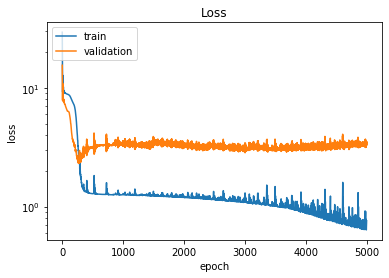

In [3]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(1,))) #1st hidden layer
#Other activations in https://keras.io/activations/
network.add(layers.Dense(512, activation='relu')) #2nd hidden layer
network.add(layers.Dense(512, activation='relu')) #3rd hidden layer
network.add(layers.Dense(1, activation=None))

network.compile(optimizer=Adam(lr=1e-3),
                loss='mean_squared_error')
history=network.fit(x, y, 
                    validation_data = (x_val, y_val),
                    epochs=5000, batch_size=25)
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

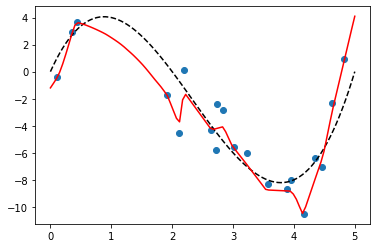

In [4]:
fig, ax = plt.subplots(1)
ax.scatter(x, y)
ax.plot(x_plot, y_plot, '--k')
ax.plot(x_plot, network.predict(x_plot), 'r')
plt.show()

The neural network overfits.

We will do early stopping using the validation dataset. As the training curves are noisy, we will also reduce learning rate from $10^{-3}$ to $10^{-4}$

Train on 20 samples, validate on 20 samples
Epoch 1/5000
20/20 [==============================] - 0s 22ms/step - loss: 30.0444 - val_loss: 17.9886
Epoch 2/5000
20/20 [==============================] - 0s 302us/step - loss: 29.4317 - val_loss: 17.6176
Epoch 3/5000
20/20 [==============================] - 0s 609us/step - loss: 28.7535 - val_loss: 17.2392
Epoch 4/5000
20/20 [==============================] - 0s 383us/step - loss: 28.0606 - val_loss: 16.8617
Epoch 5/5000
20/20 [==============================] - 0s 601us/step - loss: 27.3687 - val_loss: 16.4935
Epoch 6/5000
20/20 [==============================] - 0s 649us/step - loss: 26.6927 - val_loss: 16.1327
Epoch 7/5000
20/20 [==============================] - 0s 471us/step - loss: 26.0293 - val_loss: 15.7882
Epoch 8/5000
20/20 [==============================] - 0s 343us/step - loss: 25.3941 - val_loss: 15.4477
Epoch 9/5000
20/20 [==============================] - 0s 683us/step - loss: 24.7656 - val_loss: 15.1154
Epoch 10/5000
20/20 [

Epoch 80/5000
20/20 [==============================] - 0s 427us/step - loss: 9.1965 - val_loss: 7.8521
Epoch 81/5000
20/20 [==============================] - 0s 613us/step - loss: 9.1944 - val_loss: 7.8412
Epoch 82/5000
20/20 [==============================] - 0s 495us/step - loss: 9.1930 - val_loss: 7.8312
Epoch 83/5000
20/20 [==============================] - 0s 347us/step - loss: 9.1922 - val_loss: 7.8222
Epoch 84/5000
20/20 [==============================] - 0s 443us/step - loss: 9.1918 - val_loss: 7.8142
Epoch 85/5000
20/20 [==============================] - 0s 354us/step - loss: 9.1917 - val_loss: 7.8070
Epoch 86/5000
20/20 [==============================] - 0s 453us/step - loss: 9.1917 - val_loss: 7.8005
Epoch 87/5000
20/20 [==============================] - 0s 325us/step - loss: 9.1918 - val_loss: 7.7948
Epoch 88/5000
20/20 [==============================] - 0s 479us/step - loss: 9.1919 - val_loss: 7.7896
Epoch 89/5000
20/20 [==============================] - 0s 347us/step - lo

Epoch 159/5000
20/20 [==============================] - 0s 369us/step - loss: 9.1279 - val_loss: 7.5822
Epoch 160/5000
20/20 [==============================] - 0s 496us/step - loss: 9.1270 - val_loss: 7.5787
Epoch 161/5000
20/20 [==============================] - 0s 336us/step - loss: 9.1261 - val_loss: 7.5751
Epoch 162/5000
20/20 [==============================] - 0s 368us/step - loss: 9.1251 - val_loss: 7.5715
Epoch 163/5000
20/20 [==============================] - 0s 340us/step - loss: 9.1242 - val_loss: 7.5679
Epoch 164/5000
20/20 [==============================] - 0s 435us/step - loss: 9.1233 - val_loss: 7.5642
Epoch 165/5000
20/20 [==============================] - 0s 387us/step - loss: 9.1223 - val_loss: 7.5606
Epoch 166/5000
20/20 [==============================] - 0s 357us/step - loss: 9.1214 - val_loss: 7.5569
Epoch 167/5000
20/20 [==============================] - 0s 355us/step - loss: 9.1205 - val_loss: 7.5532
Epoch 168/5000
20/20 [==============================] - 0s 407us

Epoch 238/5000
20/20 [==============================] - 0s 289us/step - loss: 9.0490 - val_loss: 7.2711
Epoch 239/5000
20/20 [==============================] - 0s 322us/step - loss: 9.0480 - val_loss: 7.2672
Epoch 240/5000
20/20 [==============================] - 0s 298us/step - loss: 9.0468 - val_loss: 7.2632
Epoch 241/5000
20/20 [==============================] - 0s 291us/step - loss: 9.0457 - val_loss: 7.2590
Epoch 242/5000
20/20 [==============================] - 0s 355us/step - loss: 9.0446 - val_loss: 7.2548
Epoch 243/5000
20/20 [==============================] - 0s 321us/step - loss: 9.0435 - val_loss: 7.2505
Epoch 244/5000
20/20 [==============================] - 0s 483us/step - loss: 9.0424 - val_loss: 7.2461
Epoch 245/5000
20/20 [==============================] - 0s 283us/step - loss: 9.0413 - val_loss: 7.2418
Epoch 246/5000
20/20 [==============================] - 0s 335us/step - loss: 9.0402 - val_loss: 7.2374
Epoch 247/5000
20/20 [==============================] - 0s 282us

Epoch 317/5000
20/20 [==============================] - 0s 418us/step - loss: 8.9386 - val_loss: 6.8790
Epoch 318/5000
20/20 [==============================] - 0s 335us/step - loss: 8.9369 - val_loss: 6.8726
Epoch 319/5000
20/20 [==============================] - 0s 329us/step - loss: 8.9351 - val_loss: 6.8662
Epoch 320/5000
20/20 [==============================] - 0s 313us/step - loss: 8.9337 - val_loss: 6.8606
Epoch 321/5000
20/20 [==============================] - 0s 630us/step - loss: 8.9319 - val_loss: 6.8553
Epoch 322/5000
20/20 [==============================] - 0s 299us/step - loss: 8.9303 - val_loss: 6.8502
Epoch 323/5000
20/20 [==============================] - 0s 400us/step - loss: 8.9286 - val_loss: 6.8446
Epoch 324/5000
20/20 [==============================] - 0s 331us/step - loss: 8.9270 - val_loss: 6.8387
Epoch 325/5000
20/20 [==============================] - 0s 334us/step - loss: 8.9253 - val_loss: 6.8329
Epoch 326/5000
20/20 [==============================] - 0s 328us

Epoch 396/5000
20/20 [==============================] - 0s 310us/step - loss: 8.8029 - val_loss: 6.3860
Epoch 397/5000
20/20 [==============================] - 0s 435us/step - loss: 8.8015 - val_loss: 6.3804
Epoch 398/5000
20/20 [==============================] - 0s 321us/step - loss: 8.7999 - val_loss: 6.3749
Epoch 399/5000
20/20 [==============================] - 0s 348us/step - loss: 8.7983 - val_loss: 6.3692
Epoch 400/5000
20/20 [==============================] - 0s 309us/step - loss: 8.7967 - val_loss: 6.3630
Epoch 401/5000
20/20 [==============================] - 0s 280us/step - loss: 8.7950 - val_loss: 6.3563
Epoch 402/5000
20/20 [==============================] - 0s 579us/step - loss: 8.7933 - val_loss: 6.3493
Epoch 403/5000
20/20 [==============================] - 0s 299us/step - loss: 8.7915 - val_loss: 6.3426
Epoch 404/5000
20/20 [==============================] - 0s 419us/step - loss: 8.7898 - val_loss: 6.3362
Epoch 405/5000
20/20 [==============================] - 0s 272us

Epoch 475/5000
20/20 [==============================] - 0s 548us/step - loss: 8.6252 - val_loss: 5.8935
Epoch 476/5000
20/20 [==============================] - 0s 393us/step - loss: 8.6191 - val_loss: 5.8866
Epoch 477/5000
20/20 [==============================] - 0s 357us/step - loss: 8.6149 - val_loss: 5.8795
Epoch 478/5000
20/20 [==============================] - 0s 340us/step - loss: 8.6122 - val_loss: 5.8728
Epoch 479/5000
20/20 [==============================] - 0s 465us/step - loss: 8.6092 - val_loss: 5.8666
Epoch 480/5000
20/20 [==============================] - 0s 364us/step - loss: 8.6063 - val_loss: 5.8604
Epoch 481/5000
20/20 [==============================] - 0s 411us/step - loss: 8.6033 - val_loss: 5.8533
Epoch 482/5000
20/20 [==============================] - 0s 364us/step - loss: 8.6002 - val_loss: 5.8433
Epoch 483/5000
20/20 [==============================] - 0s 487us/step - loss: 8.5968 - val_loss: 5.8328
Epoch 484/5000
20/20 [==============================] - 0s 342us

Epoch 554/5000
20/20 [==============================] - 0s 268us/step - loss: 8.2687 - val_loss: 4.9847
Epoch 555/5000
20/20 [==============================] - 0s 464us/step - loss: 8.2628 - val_loss: 4.9708
Epoch 556/5000
20/20 [==============================] - 0s 314us/step - loss: 8.2570 - val_loss: 4.9560
Epoch 557/5000
20/20 [==============================] - 0s 516us/step - loss: 8.2512 - val_loss: 4.9427
Epoch 558/5000
20/20 [==============================] - 0s 314us/step - loss: 8.2454 - val_loss: 4.9316
Epoch 559/5000
20/20 [==============================] - 0s 394us/step - loss: 8.2394 - val_loss: 4.9182
Epoch 560/5000
20/20 [==============================] - 0s 299us/step - loss: 8.2333 - val_loss: 4.9010
Epoch 561/5000
20/20 [==============================] - 0s 442us/step - loss: 8.2274 - val_loss: 4.8829
Epoch 562/5000
20/20 [==============================] - 0s 364us/step - loss: 8.2216 - val_loss: 4.8682
Epoch 563/5000
20/20 [==============================] - 0s 460us

Epoch 633/5000
20/20 [==============================] - 0s 380us/step - loss: 7.7714 - val_loss: 3.9118
Epoch 634/5000
20/20 [==============================] - 0s 295us/step - loss: 7.7651 - val_loss: 3.9011
Epoch 635/5000
20/20 [==============================] - 0s 275us/step - loss: 7.7589 - val_loss: 3.8883
Epoch 636/5000
20/20 [==============================] - 0s 296us/step - loss: 7.7524 - val_loss: 3.8775
Epoch 637/5000
20/20 [==============================] - 0s 634us/step - loss: 7.7461 - val_loss: 3.8668
Epoch 638/5000
20/20 [==============================] - 0s 341us/step - loss: 7.7398 - val_loss: 3.8541
Epoch 639/5000
20/20 [==============================] - 0s 298us/step - loss: 7.7334 - val_loss: 3.8431
Epoch 640/5000
20/20 [==============================] - 0s 307us/step - loss: 7.7271 - val_loss: 3.8377
Epoch 641/5000
20/20 [==============================] - 0s 321us/step - loss: 7.7207 - val_loss: 3.8309
Epoch 642/5000
20/20 [==============================] - 0s 395us

Epoch 712/5000
20/20 [==============================] - 0s 393us/step - loss: 7.2817 - val_loss: 3.3866
Epoch 713/5000
20/20 [==============================] - 0s 344us/step - loss: 7.2756 - val_loss: 3.3862
Epoch 714/5000
20/20 [==============================] - 0s 515us/step - loss: 7.2697 - val_loss: 3.3782
Epoch 715/5000
20/20 [==============================] - 0s 362us/step - loss: 7.2635 - val_loss: 3.3676
Epoch 716/5000
20/20 [==============================] - 0s 476us/step - loss: 7.2574 - val_loss: 3.3600
Epoch 717/5000
20/20 [==============================] - 0s 355us/step - loss: 7.2513 - val_loss: 3.3571
Epoch 718/5000
20/20 [==============================] - 0s 481us/step - loss: 7.2450 - val_loss: 3.3539
Epoch 719/5000
20/20 [==============================] - 0s 317us/step - loss: 7.2390 - val_loss: 3.3507
Epoch 720/5000
20/20 [==============================] - 0s 463us/step - loss: 7.2328 - val_loss: 3.3449
Epoch 721/5000
20/20 [==============================] - 0s 340us

Epoch 791/5000
20/20 [==============================] - 0s 361us/step - loss: 6.6664 - val_loss: 3.0792
Epoch 792/5000
20/20 [==============================] - 0s 565us/step - loss: 6.6556 - val_loss: 3.0779
Epoch 793/5000
20/20 [==============================] - 0s 313us/step - loss: 6.6448 - val_loss: 3.0770
Epoch 794/5000
20/20 [==============================] - 0s 462us/step - loss: 6.6340 - val_loss: 3.0660
Epoch 795/5000
20/20 [==============================] - 0s 328us/step - loss: 6.6236 - val_loss: 3.0626
Epoch 796/5000
20/20 [==============================] - 0s 462us/step - loss: 6.6128 - val_loss: 3.0634
Epoch 797/5000
20/20 [==============================] - 0s 355us/step - loss: 6.6019 - val_loss: 3.0627
Epoch 798/5000
20/20 [==============================] - 0s 437us/step - loss: 6.5911 - val_loss: 3.0563
Epoch 799/5000
20/20 [==============================] - 0s 342us/step - loss: 6.5802 - val_loss: 3.0491
Epoch 800/5000
20/20 [==============================] - 0s 449us

Epoch 870/5000
20/20 [==============================] - 0s 505us/step - loss: 5.4777 - val_loss: 2.8658
Epoch 871/5000
20/20 [==============================] - 0s 365us/step - loss: 5.4583 - val_loss: 2.8567
Epoch 872/5000
20/20 [==============================] - 0s 447us/step - loss: 5.4378 - val_loss: 2.8487
Epoch 873/5000
20/20 [==============================] - 0s 459us/step - loss: 5.4190 - val_loss: 2.8494
Epoch 874/5000
20/20 [==============================] - 0s 337us/step - loss: 5.3985 - val_loss: 2.8462
Epoch 875/5000
20/20 [==============================] - 0s 436us/step - loss: 5.3804 - val_loss: 2.8450
Epoch 876/5000
20/20 [==============================] - 0s 332us/step - loss: 5.3617 - val_loss: 2.8415
Epoch 877/5000
20/20 [==============================] - 0s 439us/step - loss: 5.3415 - val_loss: 2.8352
Epoch 878/5000
20/20 [==============================] - 0s 310us/step - loss: 5.3215 - val_loss: 2.8325
Epoch 879/5000
20/20 [==============================] - 0s 461us

Epoch 949/5000
20/20 [==============================] - 0s 502us/step - loss: 3.9355 - val_loss: 2.6921
Epoch 950/5000
20/20 [==============================] - 0s 366us/step - loss: 3.9150 - val_loss: 2.6927
Epoch 951/5000
20/20 [==============================] - 0s 501us/step - loss: 3.8944 - val_loss: 2.6984
Epoch 952/5000
20/20 [==============================] - 0s 346us/step - loss: 3.8738 - val_loss: 2.7009
Epoch 953/5000
20/20 [==============================] - 0s 497us/step - loss: 3.8539 - val_loss: 2.7015
Epoch 954/5000
20/20 [==============================] - 0s 295us/step - loss: 3.8335 - val_loss: 2.6969
Epoch 955/5000
20/20 [==============================] - 0s 511us/step - loss: 3.8139 - val_loss: 2.7024
Epoch 956/5000
20/20 [==============================] - 0s 329us/step - loss: 3.7931 - val_loss: 2.7014
Epoch 957/5000
20/20 [==============================] - 0s 475us/step - loss: 3.7731 - val_loss: 2.6962
Epoch 958/5000
20/20 [==============================] - 0s 336us

Epoch 1028/5000
20/20 [==============================] - 0s 539us/step - loss: 2.6416 - val_loss: 2.7276
Epoch 1029/5000
20/20 [==============================] - 0s 350us/step - loss: 2.6279 - val_loss: 2.7316
Epoch 1030/5000
20/20 [==============================] - 0s 481us/step - loss: 2.6157 - val_loss: 2.7331
Epoch 1031/5000
20/20 [==============================] - 0s 363us/step - loss: 2.6016 - val_loss: 2.7330
Epoch 1032/5000
20/20 [==============================] - 0s 430us/step - loss: 2.5902 - val_loss: 2.7388
Epoch 1033/5000
20/20 [==============================] - 0s 323us/step - loss: 2.5758 - val_loss: 2.7390
Epoch 1034/5000
20/20 [==============================] - 0s 478us/step - loss: 2.5647 - val_loss: 2.7422
Epoch 1035/5000
20/20 [==============================] - 0s 326us/step - loss: 2.5525 - val_loss: 2.7437
Epoch 1036/5000
20/20 [==============================] - 0s 470us/step - loss: 2.5392 - val_loss: 2.7452
Epoch 1037/5000
20/20 [==============================] 

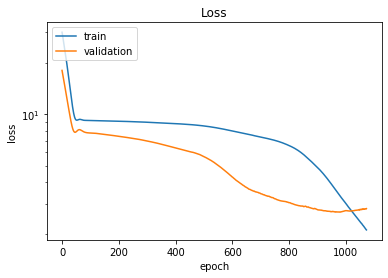

In [5]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(1,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(1, activation=None))

network.compile(optimizer=Adam(lr=1e-4),
                loss='mean_squared_error')
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None)]
history=network.fit(x, y, 
                    validation_data = (x_val, y_val),
                    epochs=5000, batch_size=25,
                    callbacks=callbacks)
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

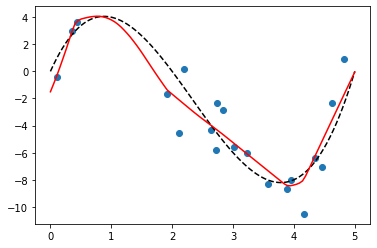

In [6]:
fig, ax = plt.subplots(1)
ax.scatter(x, y)
ax.plot(x_plot, y_plot, '--k')
ax.plot(x_plot, network.predict(x_plot), 'r')
plt.show()

**Ex 1:** Change the neural network (number of layers, number of neurons, activation function) and the hyperparameters (batch size, learning rate, early-stopping, optimiser). There will be a competition, and the team minimising the error in a new test set that we will provide wins.